In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = torch.FloatTensor(np.random.random((1, 4, 84, 84))).cuda()

In [3]:
img.shape

torch.Size([1, 4, 84, 84])

In [6]:
xx2 = nn.Conv2d(in_channels=4, out_channels=16, kernel_size=5, stride=1, padding=2).cuda()(img)
xx2.shape

torch.Size([1, 16, 84, 84])

In [7]:
xx3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1).cuda()(xx2)
xx3.shape

torch.Size([1, 16, 84, 84])

In [8]:
xx4 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1).cuda()(xx3)
xx4.shape

torch.Size([1, 32, 84, 84])

In [41]:
policy_nn = nn.Sequential(
                nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2),
                nn.ReLU(),
                nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),
                nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=2),
                nn.ReLU(),
                nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=2),
                nn.ReLU()
).cuda()

In [42]:
xx5 = policy_nn(xx4)
xx5.shape

torch.Size([1, 512, 1, 1])

In [43]:
32*5*5

800

In [44]:
xx4.shape

torch.Size([1, 32, 84, 84])

In [45]:
kernels = torch.FloatTensor(np.random.random((1, 32, 5, 5))).cuda()
kernels.shape

torch.Size([1, 32, 5, 5])

In [48]:
import torch.nn.functional as F

In [51]:
F.conv2d(xx4[0:1, 0:1], kernels[0:1, 0:1], padding=2).shape

torch.Size([1, 1, 84, 84])

In [60]:
Ra = []
for i in range(32):
    Ra.append(F.conv2d(xx4[:, i:i+1], kernels[:, i:i+1], padding=2))

In [61]:
Ra = torch.cat(Ra, dim=1)

In [62]:
Ra.shape

torch.Size([1, 32, 84, 84])

In [63]:
motion = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels=32, out_channels=2, kernel_size=3, stride=1, padding=1),
).cuda()

In [64]:
motion(Ra).shape

torch.Size([1, 2, 84, 84])

In [65]:
import cv2

In [73]:
cap = cv2.VideoCapture("/home/namrata/Videos/IMG_7055.mov")

In [74]:
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

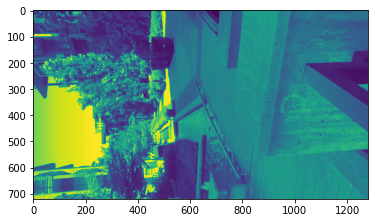

In [78]:
plt.imshow(prvs)

In [82]:
ret, frame2 = cap.read()
next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

In [83]:
flow.shape

(720, 1280, 2)

In [88]:
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])

In [89]:
mag.shape, ang.shape

((720, 1280), (720, 1280))

In [90]:
hsv[...,0] = ang*180/np.pi/2

In [91]:
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)

In [92]:
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

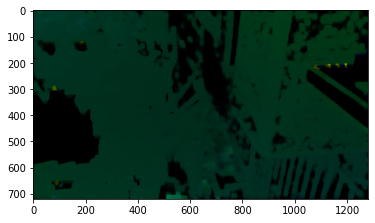

In [93]:
plt.imshow(rgb)